# **A/B Testing Analysis - Facebook VS Adword**

**Business Problem**

Our marketing agency is focused on maximizing ROI for our client's advertising campaigns. To evaluate platform effectiveness, we have conducted two ad campaigns one on Facebook and another on AdWords. Our goal is to analyze which platform performs better in terms of clicks, conversions, and overall cost-efficiency. By determining the most effective option, we can optimize resource allocation and enhance our advertising strategies to drive better outcomes for our clients.

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
!gdown 17Ux7Bj_nKYK0ac6DnruytjxPjzuEnKet
df = pd.read_csv('/content/A_B_testing_dataset.csv')

Downloading...
From: https://drive.google.com/uc?id=17Ux7Bj_nKYK0ac6DnruytjxPjzuEnKet
To: /content/A_B_testing_dataset.csv
100% 93.2k/93.2k [00:00<00:00, 64.1MB/s]


**Dataset Description**

- **date_of_campaign:** The date of each campaign, ranging from 2021 to 2024.
- **facebook_ad_campaign:** The name of the Facebook ad campaign.
- **facebook_ad_views:** The number of people who viewed the Facebook ad.
- **facebook_ad_clicks:** The number of people who clicked the Facebook ad after viewing it.
- **facebook_ad_conversions:** The number of people who became customers after clicking the Facebook ad.
- **facebook_cost_per_ad:** The cost (in USD $) of running a Facebook ad.

- **facebook_ctr:** Facebook Click-Through Rate in % => (facebook_ad_clicks / facebook_ad_views) × 100
- **facebook_conversion_rate:** Facebook conversion rate in %
=> (facebook_ad_conversions / facebook_ad_clicks) × 100
- **facebook_cost_per_click:** Cost per click for Facebook ads (in USD $) => (facebook_cost_per_ad / facebook_ad_clicks)
- **adword_ad_campaign:** The name of the AdWords campaign.
- **adword_ad_views:** The number of people who viewed the AdWords ad.
- **adword_ad_clicks:** The number of people who clicked the AdWords ad after viewing it.
- **adword_ad_conversions:** The number of people who became customers after clicking the AdWords ad.
- **adword_cost_per_ad:** The cost (in USD) of running an AdWords ad.

- **adword_ctr:** AdWords Click-Through Rate in % (CTR) => (adword_ad_clicks / adword_ad_views) × 100
- **adword_conversion_rate:** AdWords conversion rate in % =>(adword_ad_conversions / adword_ad_clicks) × 100
- **adword_cost_per_click:** Cost per click for AdWords ads (in USD $) =>(adword_cost_per_ad / adword_ad_clicks)

In [3]:
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_campaign          1000 non-null   object 
 1   facebook_ad_campaign      1000 non-null   object 
 2   facebook_ad_views         1000 non-null   int64  
 3   facebook_ad_clicks        1000 non-null   int64  
 4   facebook_ad_conversions   1000 non-null   int64  
 5   facebook_cost_per_ad      1000 non-null   int64  
 6   facebook_ctr              1000 non-null   float64
 7   facebook_conversion_rate  1000 non-null   float64
 8   facebook_cost_per_click   1000 non-null   float64
 9   adword_ad_campaign        1000 non-null   object 
 10  adword_ad_views           1000 non-null   int64  
 11  adword_ad_clicks          1000 non-null   int64  
 12  adword_ad_conversions     1000 non-null   int64  
 13  adword_cost_per_ad        1000 non-null   int64  
 14  adword_ct

In [6]:
# checking duplicates
df.duplicated().sum()

0

In [7]:
#changing datatype of date column
df['date_of_campaign'] = pd.to_datetime(df['date_of_campaign'])

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date_of_campaign,1000,2023-07-04 07:13:26.399999744,2021-12-22 00:00:00,2022-10-07 18:00:00,2023-07-20 12:00:00,2024-03-24 00:00:00,2024-12-20 00:00:00,NaN
facebook_ad_views,1000.0,2152.031,1050.0,1600.25,2123.5,2706.25,3320.0,661.982166
facebook_ad_clicks,1000.0,44.196,15.0,30.0,44.5,58.0,73.0,16.833328
facebook_ad_conversions,1000.0,11.975,5.0,8.0,12.0,16.0,19.0,4.298471
facebook_cost_per_ad,1000.0,156.61,60.0,110.0,156.0,205.0,250.0,54.918904
facebook_ctr,1000.0,2.28316,0.49,1.3675,2.07,2.9225,6.86,1.2067
facebook_conversion_rate,1000.0,32.69608,6.85,18.0525,27.12,41.88,118.75,20.570796
facebook_cost_per_click,1000.0,4.3105,0.96,2.3375,3.6,5.61,16.53,2.751582
adword_ad_views,1000.0,4771.438,3715.0,4258.25,4808.5,5300.75,5754.0,598.647684
adword_ad_clicks,1000.0,60.128,31.0,45.0,60.0,75.0,89.0,17.047822


- Average Click through rate of Facebook is 2.28%
- Average Conversion rate of Facebook is 32.7%
- Average Click through rate of Adwords is 1.28%
- Average Conversion rate of Adwords is 10.8%

## Ad campaign performance comparision



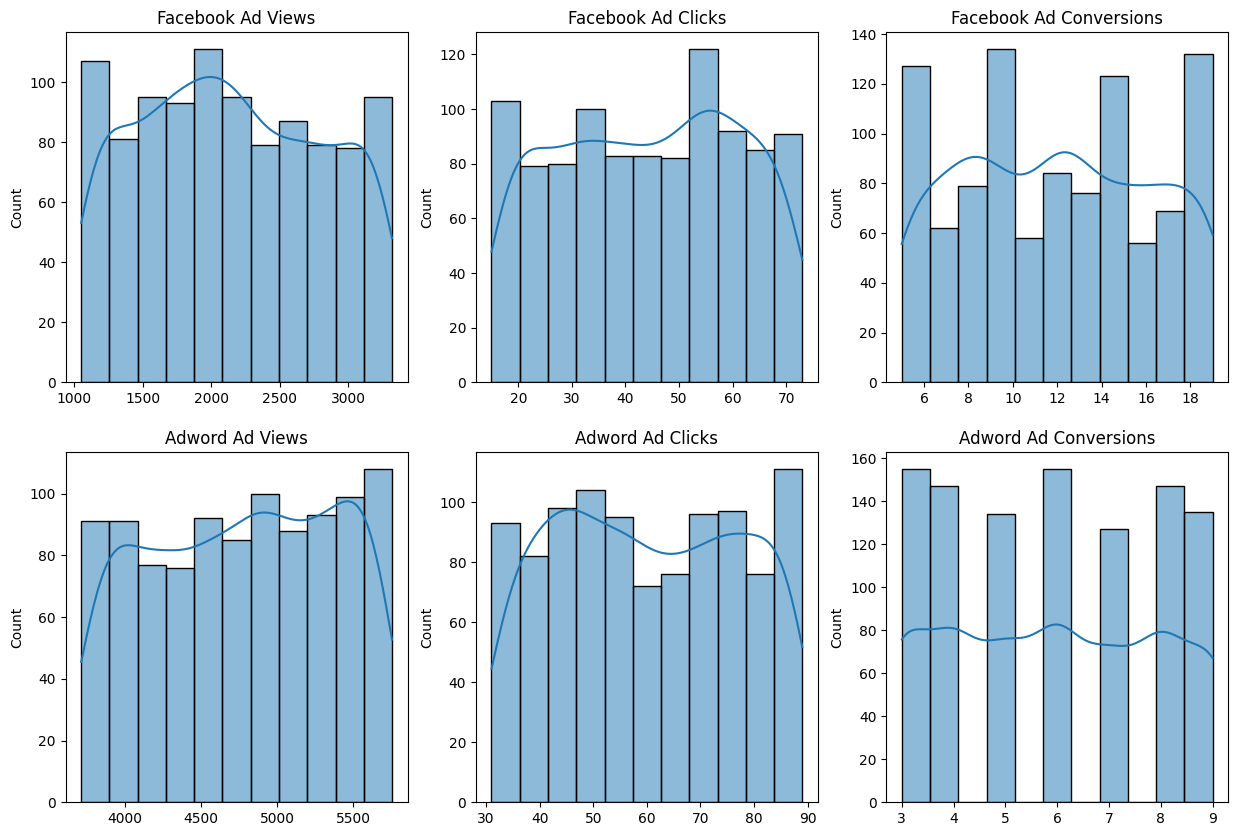

In [9]:
cols = ['facebook_ad_views', 'facebook_ad_clicks', 'facebook_ad_conversions', 'adword_ad_views', 'adword_ad_clicks', 'adword_ad_conversions']
plt.figure(figsize=(15,10))
for i in cols:
  plt.subplot(2,3,cols.index(i)+1)
  plt.title(i.replace('_',' ').title())
  sns.histplot(df[i], kde=True)
  plt.xlabel('')

Seems like views, clicks and conversions of both the ad platforms are evenly distributed with no outliers but has variance.

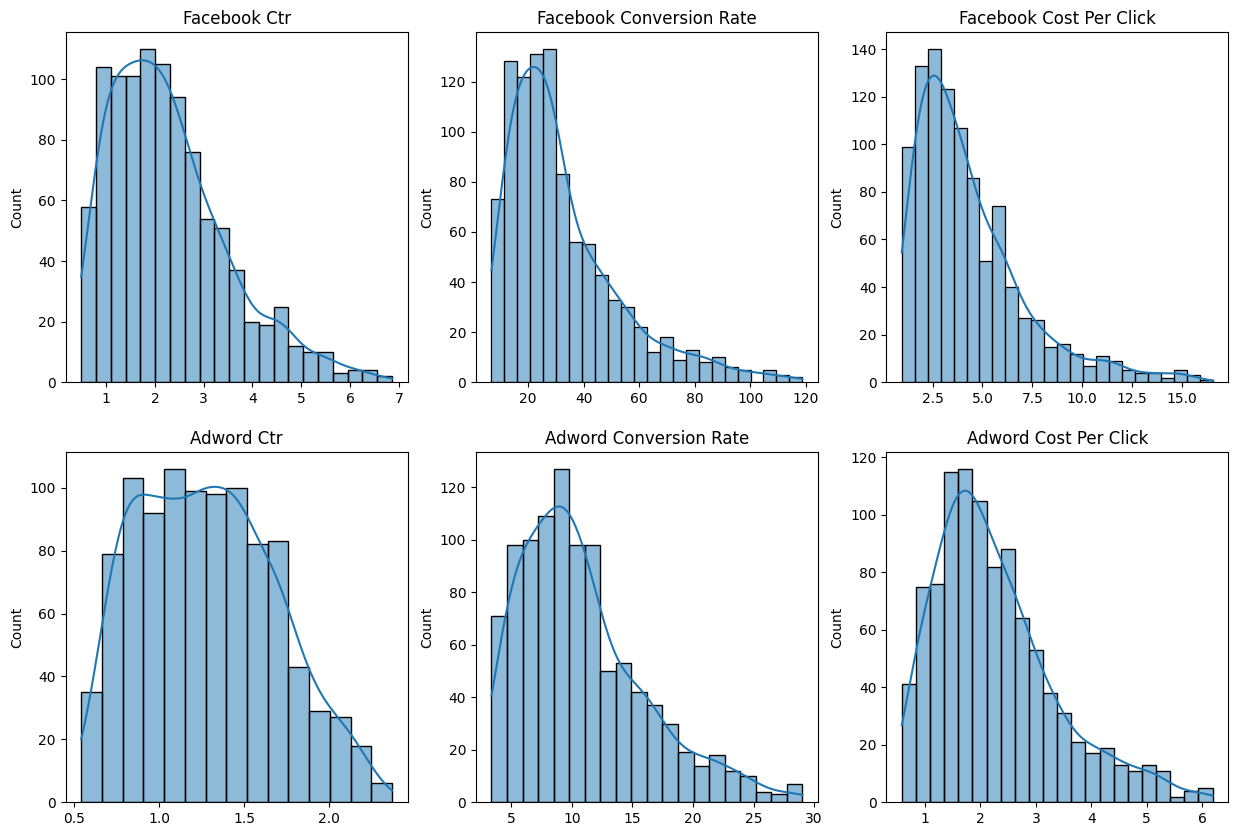

In [10]:
cols = ['facebook_ctr', 'facebook_conversion_rate', 'facebook_cost_per_click', 'adword_ctr', 'adword_conversion_rate', 'adword_cost_per_click']
plt.figure(figsize=(15,10))
for i in cols:
  plt.subplot(2,3,cols.index(i)+1)
  plt.title(i.replace('_',' ').title())
  sns.histplot(df[i], kde=True)
  plt.xlabel('')

We can see that CTR, Conversion rates and Cost per clicks of both platforms are right skewed having outliers.

### Conversions comparision

In [11]:
def conersion_category(x):
  if x < 6:
    return '0-5'
  elif x < 11:
    return '6-10'
  elif x < 16:
    return '11-15'
  elif x < 21:
    return '16-20'
  else:
    return '20+'

In [12]:
df['facebook_ad_conversions'].apply(lambda x: conersion_category(x)).value_counts().reset_index()

,facebook_ad_conversions,count
0,11-15,341
1,6-10,337
2,16-20,257
3,0-5,65


In [13]:
df['adword_ad_conversions'].apply(lambda x: conersion_category(x)).value_counts().reset_index()

,adword_ad_conversions,count
0,6-10,564
1,0-5,436


In [14]:
fb_conversions = df['facebook_ad_conversions'].apply(lambda x: conersion_category(x)).value_counts().reset_index()
fb_conversions = fb_conversions.rename(columns={'facebook_ad_conversions':'category', 'count':'Facebook'})
adw_conversions = df['adword_ad_conversions'].apply(lambda x: conersion_category(x)).value_counts().reset_index()
adw_conversions = adw_conversions.rename(columns={'adword_ad_conversions':'category', 'count':'AdWords'})
ad_conversions_category = pd.merge(fb_conversions, adw_conversions, how='outer', on='category')
ad_conversions_category

,category,Facebook,AdWords
0,0-5,65,436.0
1,11-15,341,NaN
2,16-20,257,NaN
3,6-10,337,564.0


In [15]:
ad_conversions_category = ad_conversions_category.reindex([0,3,1,2]).reset_index(drop=True)
ad_conversions_category

,category,Facebook,AdWords
0,0-5,65,436.0
1,6-10,337,564.0
2,11-15,341,NaN
3,16-20,257,NaN


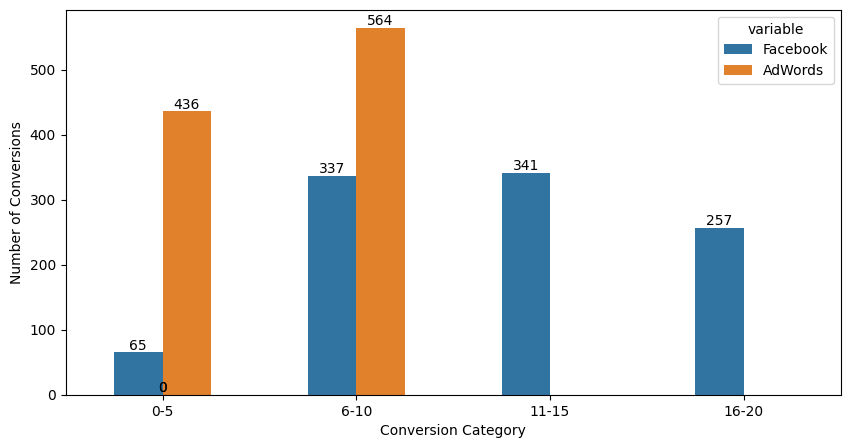

In [51]:
plt.figure(figsize=(10,5))
g = sns.barplot(data=ad_conversions_category.melt(id_vars=['category'], value_vars=['Facebook', 'AdWords']),
            x='category', y='value', hue='variable', width=0.5)
plt.ylabel('Number of Conversions')
plt.xlabel('Conversion Category')
for p in g.patches:
  g.text(p.get_x() + p.get_width() / 2, p.get_height(),  f'{p.get_height():.0f}', ha='center', va='bottom')
plt.show()

- This data shows that Facebook has high more high-conversion days than Adwords.
- There is a significant variance in the number of high-conversion days between two platforms.
- Adwords has conversions of 10 or below in each day where as Facebook has 20 or below.

### Which platform has higher conversion rates?

In [17]:
df[['facebook_conversion_rate', 'adword_conversion_rate']].mean()

,0
facebook_conversion_rate,32.69608
adword_conversion_rate,10.80751


- **Null Hypothesis**: Both Facebook and AdWords have same average conversion rates
- **Alternate Hypotheis:** Facebook has higher average conversion rates than AdWords

In [18]:
H0 = 'Both Facebook and AdWords have same average conversion rates'
Ha = 'Facebook has higher average conversion rates than AdWords'
alpha = 0.05

t_stat, p_val = stats.ttest_ind(df['facebook_conversion_rate'], df['adword_conversion_rate'], equal_var=False, alternative='greater')

print(f't-statistic: {t_stat}')
print(f'p-value: {p_val}\n')

if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

t-statistic: 32.62045547744514
p-value: 3.5580132532960424e-165

Result: Reject Null Hypothesis
Facebook has higher average conversion rates than AdWords


### Which platform has lesser cost per click?

In [19]:
df[['facebook_cost_per_click', 'adword_cost_per_click']].mean()

,0
facebook_cost_per_click,4.31050
adword_cost_per_click,2.26554


- **Null Hypothesis**: Both Facebook and AdWords have same average Cost per click
- **Alternate Hypotheis:** Adword has lesser average Cost per click than Facebook

In [20]:
H0 = 'Both Facebook and AdWords have same average Cost per click'
Ha = 'Adword has lesser average Cost per click than Facebook'
alpha = 0.05

t_stat, p_val = stats.ttest_ind(df['adword_cost_per_click'], df['facebook_cost_per_click'], equal_var=False, alternative='less')

print(f't-statistic: {t_stat}')
print(f'p-value: {p_val}\n')

if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

t-statistic: -21.81761965852683
p-value: 1.3950540029254255e-90

Result: Reject Null Hypothesis
Adword has lesser average Cost per click than Facebook


### Which platform has higher views?

In [21]:
df[['facebook_ad_views', 'adword_ad_views']].mean()

,0
facebook_ad_views,2152.031
adword_ad_views,4771.438


- **Null Hypothesis**: Both Facebook and AdWords have same average views
- **Alternate Hypotheis:** Adword has more average views than Facebook

In [22]:
H0 = 'Both Facebook and AdWords have same average views'
Ha = 'Adword has more average views than Facebook'
alpha = 0.05

t_stat, p_val = stats.ttest_ind(df['adword_ad_views'], df['facebook_ad_views'], equal_var=False, alternative='greater')

print(f't-statistic: {t_stat}')
print(f'p-value: {p_val}\n')

if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

t-statistic: 92.80748119475
p-value: 0.0

Result: Reject Null Hypothesis
Adword has more average views than Facebook


### Which platform has higher ctr (user engagement)?

In [23]:
df[['facebook_ctr', 'adword_ctr']].mean()

,0
facebook_ctr,2.28316
adword_ctr,1.28095


- **Null Hypothesis**: Both Facebook and AdWords have same average CTRs
- **Alternate Hypotheis:** Facebook has higher average CTR than AdWords

In [24]:
H0 = 'Both Facebook and AdWords have same average CTRs'
Ha = 'Facebook has higher average CTR than AdWords'
alpha = 0.05

t_stat, p_val = stats.ttest_ind(df['facebook_ctr'], df['adword_ctr'], equal_var=False, alternative='greater')

print(f't-statistic: {t_stat}')
print(f'p-value: {p_val}\n')

if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

t-statistic: 24.914527350282636
p-value: 2.244609815844214e-111

Result: Reject Null Hypothesis
Facebook has higher average CTR than AdWords


### Which platform has high Return on Ad Spend?

In [25]:
df['facebook_total_spend'] = df['facebook_cost_per_click'] * df['facebook_ad_clicks']
df['adword_total_spend'] = df['adword_cost_per_click'] * df['adword_ad_clicks']

# Assume average revenue per conversion
avg_revenue_per_conversion = 50

df['facebook_revenue'] = df['facebook_ad_conversions'] * avg_revenue_per_conversion
df['adword_revenue'] = df['adword_ad_conversions'] * avg_revenue_per_conversion

fb_roas = df['facebook_revenue'].sum() / df['facebook_total_spend'].sum()
adw_roas = df['adword_revenue'].sum() / df['adword_total_spend'].sum()

print(f"Facebook ROAS: {fb_roas:.2f}")
print(f"AdWords ROAS: {adw_roas:.2f}\n")

if fb_roas > adw_roas:
  print('Facebook has higher ROAS than Adwords')
else:
  print('Adwords has higher ROAS than Facebook')

Facebook ROAS: 3.82
AdWords ROAS: 2.38

Facebook has higher ROAS than Adwords


### Which platform has lower Cost Per Acquisation?

In [26]:
fb_cpa = df['facebook_total_spend'].sum() / df['facebook_ad_conversions'].sum()
adw_cpa = df['adword_total_spend'].sum() / df['adword_ad_conversions'].sum()

print(f"Facebook CPA: {fb_cpa:.2f}")
print(f"AdWords CPA: {adw_cpa:.2f}\n")

if fb_cpa < adw_cpa:
  print('Facebook has lower CPA than Adwords')
else:
  print('Adwords has lower CPA than Facebook')

Facebook CPA: 13.08
AdWords CPA: 21.03

Facebook has lower CPA than Adwords


### Comparison of Facebook vs AdWords

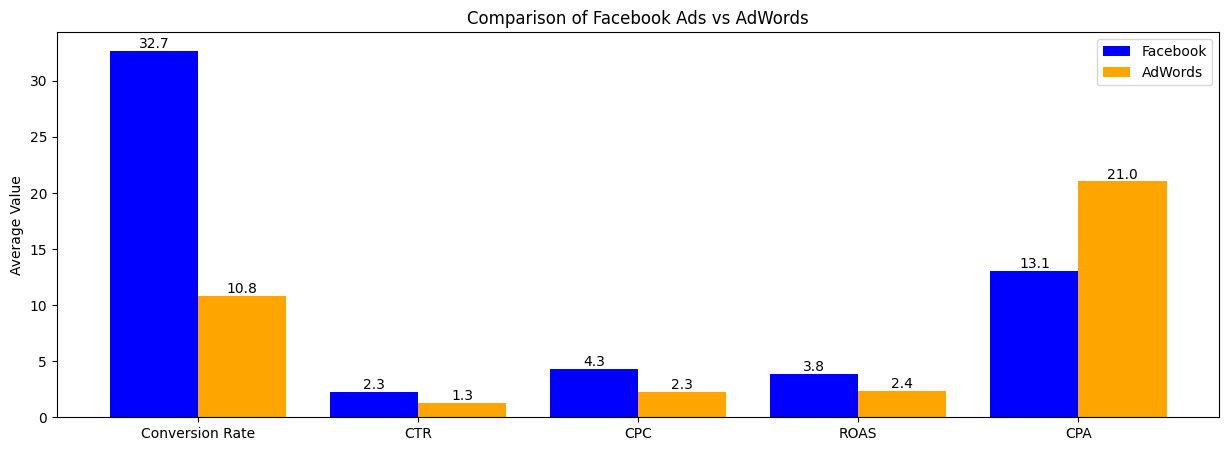

In [27]:
metrics = ['Conversion Rate', 'CTR', 'CPC','ROAS', 'CPA']
facebook_values = [df['facebook_conversion_rate'].mean(), df['facebook_ctr'].mean(),
                   df['facebook_cost_per_click'].mean(), fb_roas, fb_cpa]

adword_values = [df['adword_conversion_rate'].mean(), df['adword_ctr'].mean(),
                 df['adword_cost_per_click'].mean(), adw_roas, adw_cpa]

x = range(len(metrics))

plt.figure(figsize=(15, 5))
p1 = plt.bar(x, facebook_values, width=0.4, label='Facebook', align='center', color='blue')
for p in p1:
  plt.text(p.get_x() + p.get_width() / 2, p.get_height(),  f'{p.get_height():.1f}', ha='center', va='bottom')
p2 = plt.bar([i + 0.4 for i in x], adword_values, width=0.4, label='AdWords', align='center', color='orange')
for p in p2:
  plt.text(p.get_x() + p.get_width() / 2, p.get_height(),  f'{p.get_height():.1f}', ha='center', va='bottom')

plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Average Value')
plt.title('Comparison of Facebook Ads vs AdWords')
plt.legend()
plt.show()


In [28]:
views = df[['facebook_ad_views', 'adword_ad_views']].mean().reset_index(name='avg_value')
views = views.rename(columns={'index':'platform'})
views

,platform,avg_value
0,facebook_ad_views,2152.031
1,adword_ad_views,4771.438


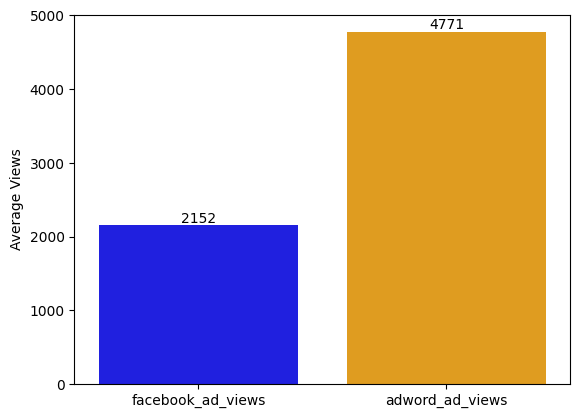

In [50]:
p = sns.barplot(data=views, x='platform', y='avg_value', palette =['blue', 'orange'])
for i in p.patches:
  p.text(i.get_x() + i.get_width() / 2, i.get_height(),  f'{i.get_height():.0f}', ha='center', va='bottom')
plt.xlabel('')
plt.ylabel('Average Views')
plt.show()

We found that
- Facebook has higher average Conversion Rates than AdWords
- Facebook has higher average Click Through Rates (CTR) than AdWords
- Adword has lesser average Cost per Click than Facebook
- Adword has more average Views than Facebook
- Facebook has higher Return on Ad Spend (ROAS) than Adwords
- Facebook has lower Cost Per Acquisation (CPA) than Adwords

So we can say that
- `Facebook` is more efficient in terms of `Conversion Rate, CTR, ROAS, and CPA`.
- `AdWords` is more `cost-effective per click and gets more views`, but conversions are lower.

If our goal is to increase brand awareness then we can invest in AdWords, but here we are looking for a platform which is better in terms of clicks, conversions, and overall cost-efficiency. So we are choosing `Facebook`.

## Facebook platform Clicks to Conversion analysis

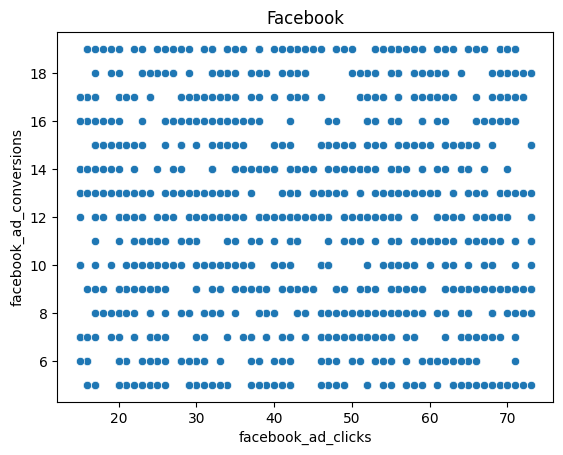

In [30]:
sns.scatterplot(data=df, x='facebook_ad_clicks', y='facebook_ad_conversions')
plt.title('Facebook')
plt.show()

Seems like there is no correlation between number of clicks and number of conversions.

In [31]:
df[['facebook_ad_clicks','facebook_ad_conversions']].corr()

,facebook_ad_clicks,facebook_ad_conversions
facebook_ad_clicks,1.000000,-0.005009
facebook_ad_conversions,-0.005009,1.000000


Facebook has a very weak negative correlation of -0.005 which states that `number of clicks are not impacting the conversions`.

## Facebook campaign metrics analysis over time

In [60]:
fb_df = df[['date_of_campaign', 'facebook_ad_views', 'facebook_ad_clicks', 'facebook_ad_conversions', 'facebook_ctr', 'facebook_conversion_rate', 'facebook_cost_per_ad', 'facebook_total_spend']]
fb_df['month'] = fb_df['date_of_campaign'].dt.month_name()
fb_df['day'] = fb_df['date_of_campaign'].dt.day_name()
fb_df.head()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_ctr,facebook_conversion_rate,facebook_cost_per_ad,facebook_total_spend,month,day
0,2021-12-22,3172,62,14,1.95,22.58,141,140.74,December,Wednesday
1,2021-12-24,3211,38,9,1.18,23.68,186,185.82,December,Friday
2,2021-12-25,1936,53,15,2.74,28.30,66,66.25,December,Saturday
3,2021-12-25,1194,45,9,3.77,20.00,71,71.10,December,Saturday
4,2021-12-26,2479,44,12,1.77,27.27,174,173.80,December,Sunday


### Weekly Conversions

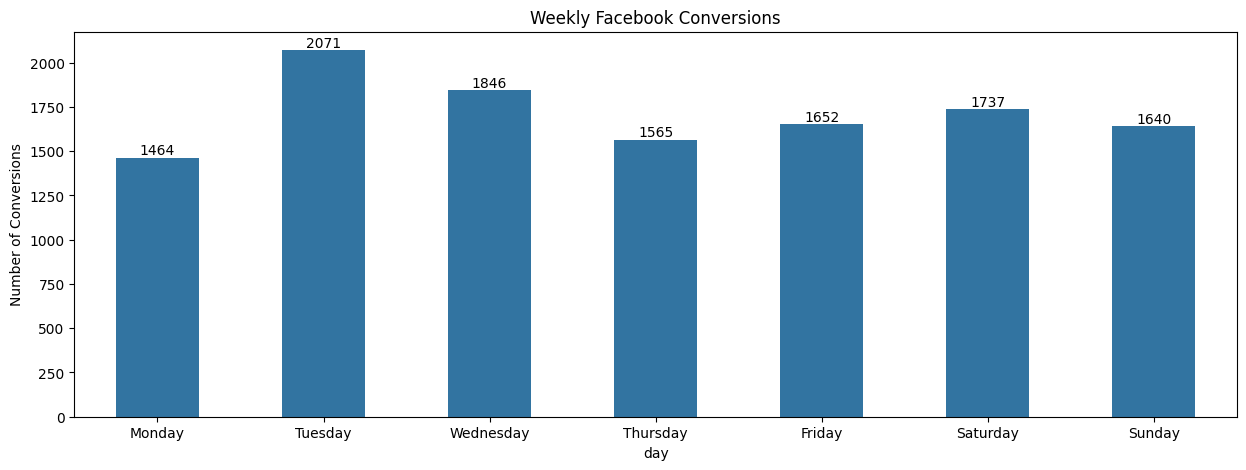

In [61]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_fb_conversions = fb_df.groupby('day')[['facebook_ad_conversions']].sum()
weekly_fb_conversions = weekly_fb_conversions.reindex(days).reset_index()
plt.figure(figsize=(15,5))
p = sns.barplot(data=weekly_fb_conversions, x='day', y='facebook_ad_conversions', width=0.5)
for i in p.patches:
  p.text(i.get_x() + i.get_width() / 2, i.get_height(),  f'{i.get_height():.0f}', ha='center', va='bottom')
plt.title('Weekly Facebook Conversions')
plt.ylabel('Number of Conversions')
plt.show()

Tuesdays exhibit high conversion compared to others.

### Monthly Conversion

In [62]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_fb_conversions = fb_df.groupby('month')[['facebook_ad_conversions']].sum()
monthly_fb_conversions = monthly_fb_conversions.reindex(months).reset_index()
monthly_fb_conversions

,month,facebook_ad_conversions
0,January,1081
1,February,947
2,March,1081
3,April,1050
4,May,1068
5,June,828
6,July,1308
7,August,812
8,September,888
9,October,1081


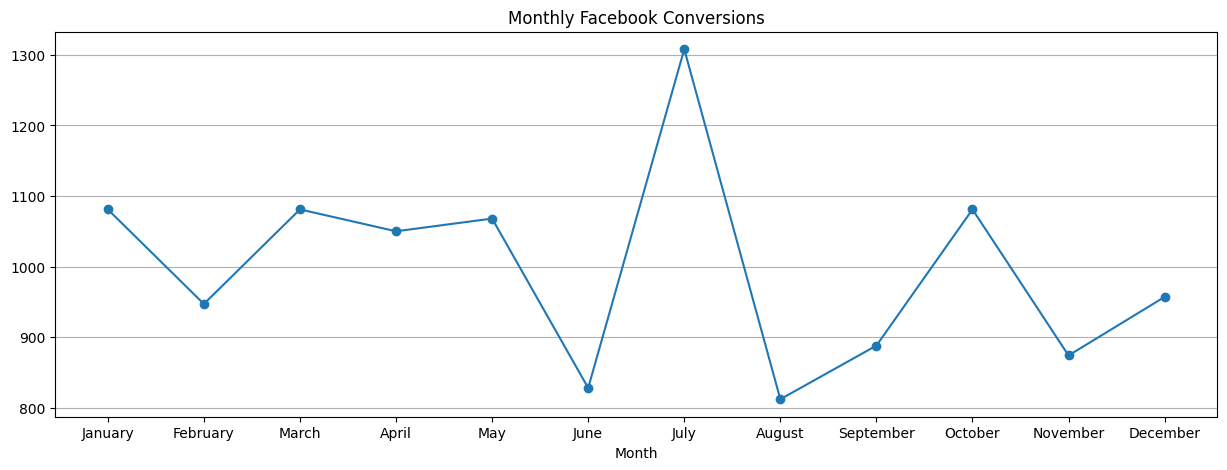

In [63]:
plt.figure(figsize=(15,5))
plt.plot(monthly_fb_conversions['month'], monthly_fb_conversions['facebook_ad_conversions'], marker='o')
plt.title('Monthly Facebook Conversions')
plt.xlabel('Month')
plt.grid(axis='y')
plt.show()

There are noticable variations in Facebook ad conversions, with a peak in July (~1300 conversions) and dips in June, August, and November, indicating possible seasonal trends, campaign effectiveness, or external factors impacting engagement.

### Monthly Facebook Ad Spend

In [65]:
monthly_fb_spend = fb_df.groupby('month')[['facebook_total_spend']].sum()
monthly_fb_spend = monthly_fb_spend.reindex(months).reset_index()
monthly_fb_spend

,month,facebook_total_spend
0,January,13836.17
1,February,12449.20
2,March,14098.77
3,April,12753.89
4,May,13899.43
5,June,10645.88
6,July,17527.35
7,August,11170.16
8,September,11637.98
9,October,14012.03


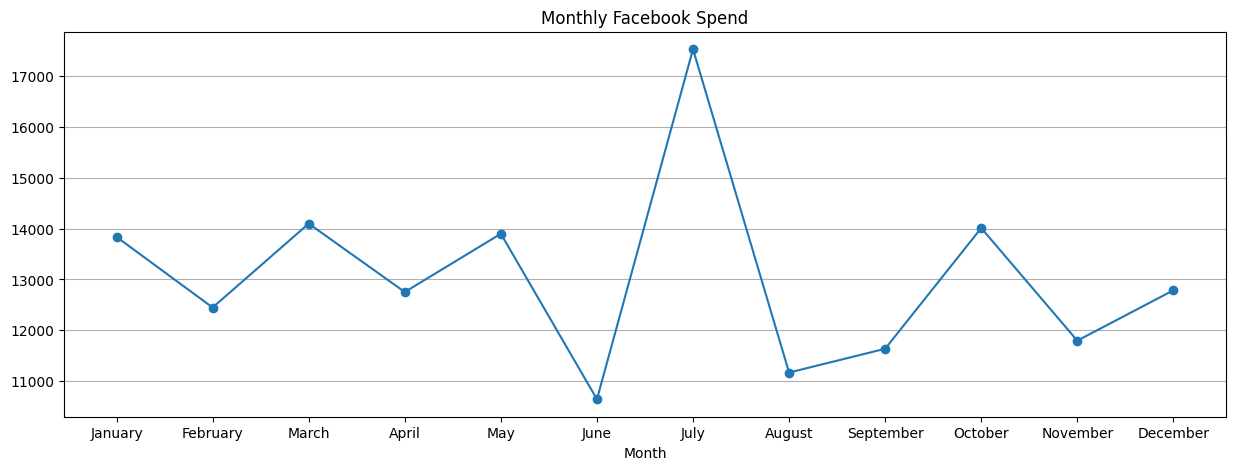

In [67]:
plt.figure(figsize=(15,5))
plt.plot(monthly_fb_spend['month'], monthly_fb_spend['facebook_total_spend'], marker='o')
plt.title('Monthly Facebook Spend')
plt.xlabel('Month')
plt.grid(axis='y')
plt.show()

Seems like ad spend has similar trend like that of conversions.

### Facebook ad funnel analysis

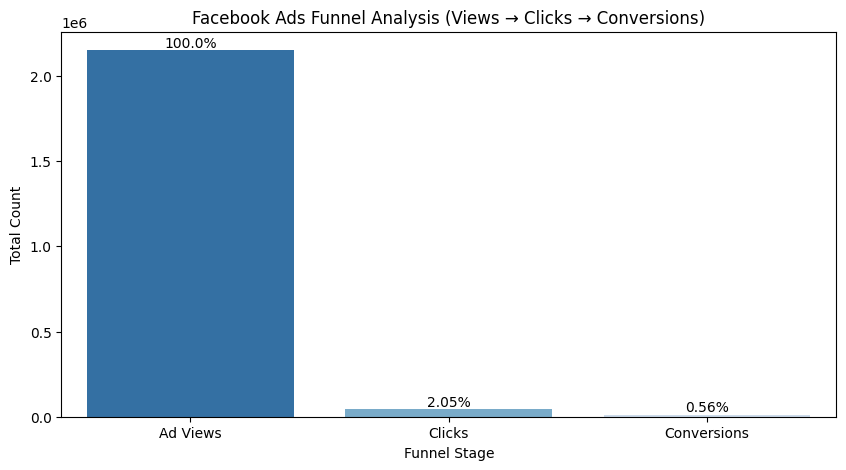

In [55]:
funnel = pd.DataFrame({
    'Stage': ['Ad Views', 'Clicks', 'Conversions'],
    'Value': [df['facebook_ad_views'].sum(), df['facebook_ad_clicks'].sum(), df['facebook_ad_conversions'].sum()]
})

plt.figure(figsize=(10,5))
p = sns.barplot(x='Stage', y='Value', data=funnel, palette="Blues_r")
for i in p.patches:
  p.text(i.get_x() + i.get_width() / 2, i.get_height(),
         s = str(round((i.get_height()/df['facebook_ad_views'].sum())*100,2))+'%',
         ha='center', va='bottom')

plt.xlabel("Funnel Stage")
plt.ylabel("Total Count")
plt.title("Facebook Ads Funnel Analysis (Views → Clicks → Conversions)")
plt.show()

2% of the total ad views are getting clicks whereas 0.5% of the total ad views are getting converted.

# Insights and Recommendations

## Insights

- Average Click through rate of Facebook is 2.28% and average Conversion rate is 32.7%
- Average Click through rate of Adwords is 1.28% and average Conversion rate is 10.8%
- Facebook has high more high-conversion days than Adwords.
- There is a significant variance in the number of high-conversion days between two platforms.
- Adwords has conversions of 10 or below in each day where as Facebook has 20 or below.
- Facebook has higher average Conversion Rates than AdWords
- Facebook has higher average Click Through Rates (CTR) than AdWords
- Adword has lesser average Cost per Click than Facebook
- Adword has more average Views than Facebook
- Facebook has higher Return on Ad Spend (ROAS) than Adwords
- Facebook has lower Cost Per Acquisation (CPA) than Adwords
- `Facebook` is more efficient in terms of `Conversion Rate, CTR, ROAS, and CPA`.
- `AdWords` is more `cost-effective per click and gets more views`, but conversions are lower.
- We are choosing `Facebook` as we are looking for a platform which is better in terms of clicks, conversions, and overall cost-efficiency.
- There is no correlation between number of clicks and number of conversions which states that number of clicks are not impacting the conversions.
- Tuesdays exhibit high conversion compared to others.
- There are noticable variations in Facebook ad conversions, with a peak in July (~1300 conversions) and dips in June, August, and November, indicating possible seasonal trends, campaign effectiveness, or external factors impacting engagement.
- Facebook's total ad spend and conversions show a similar trend over time, but this does not imply a direct causal relationship.
- `2% of the total ad views are getting clicks` whereas `0.5% of the total ad views are getting converted`.

## Recommendations

### **Recommendations for Stakeholders**  

1. **Focus More on Facebook Ads**  
   - Facebook has **higher conversion rates and better returns on ad spend** than AdWords.  
   - Shift more budget towards Facebook to get better results.  

2. **Run Ads on the Best Days**  
   - **Tuesdays** have the highest conversions, so increase spending on this day.  
   - Reduce spending in **June, August, and November**, as conversions are lower.  

3. **Improve Click-to-Conversion Rate**  
   - Since more clicks don’t always mean more conversions, focus on **better ad content, landing pages, and call-to-actions**.  
   - Test different ad creatives and messages to find what works best.  

4. **Use Better Targeting on Facebook**  
   - Retarget people who clicked but didn’t convert.  
   - Use Facebook’s **Lookalike Audiences** to find similar potential customers.  

5. **Use Both Platforms Smartly**  
   - **AdWords is cheaper per click and good for brand awareness**, so use it for visibility.  
   - **Facebook is better for conversions**, so use it for sales and customer engagement.